In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(filepath_or_buffer="../dataset/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Let's check the description of the data and since all the fetaures are numerical, we can get  description about the dataset easily.

In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


##### The features 	Pregnancies, Glucose, BloodPressure, SkinThickness,	Insulin, and BMI all have the minimum value as 0. Since it is a sample dataset, it might not be possible to have all the values as 0 in all these columns for any person. We will try to replace them with random values later on. The feature column Pregnancies although can be 0 indication non-pregnancy, but the rest of the columns having minimum value as 0 doesn't make sense.

In [4]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

## Let's check if there is any null values in the dataset

In [5]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

##### This indicates that there is no null value in the dataset.

## Let's rectify the feature columns observed earlier. Replacing the 0 values in all the above mentioned feature columns with their mean.

In [6]:
df["BMI"] = df["BMI"].replace(0, df["BMI"].mean())
df["Glucose"] = df["Glucose"].replace(0, df["Glucose"].mean())
df["BloodPressure"] = df["BloodPressure"].replace(0, df["BloodPressure"].mean())
df["SkinThickness"] = df["SkinThickness"].replace(0, df["SkinThickness"].mean())
df["Insulin"] = df["Insulin"].replace(0, df["Insulin"].mean())

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


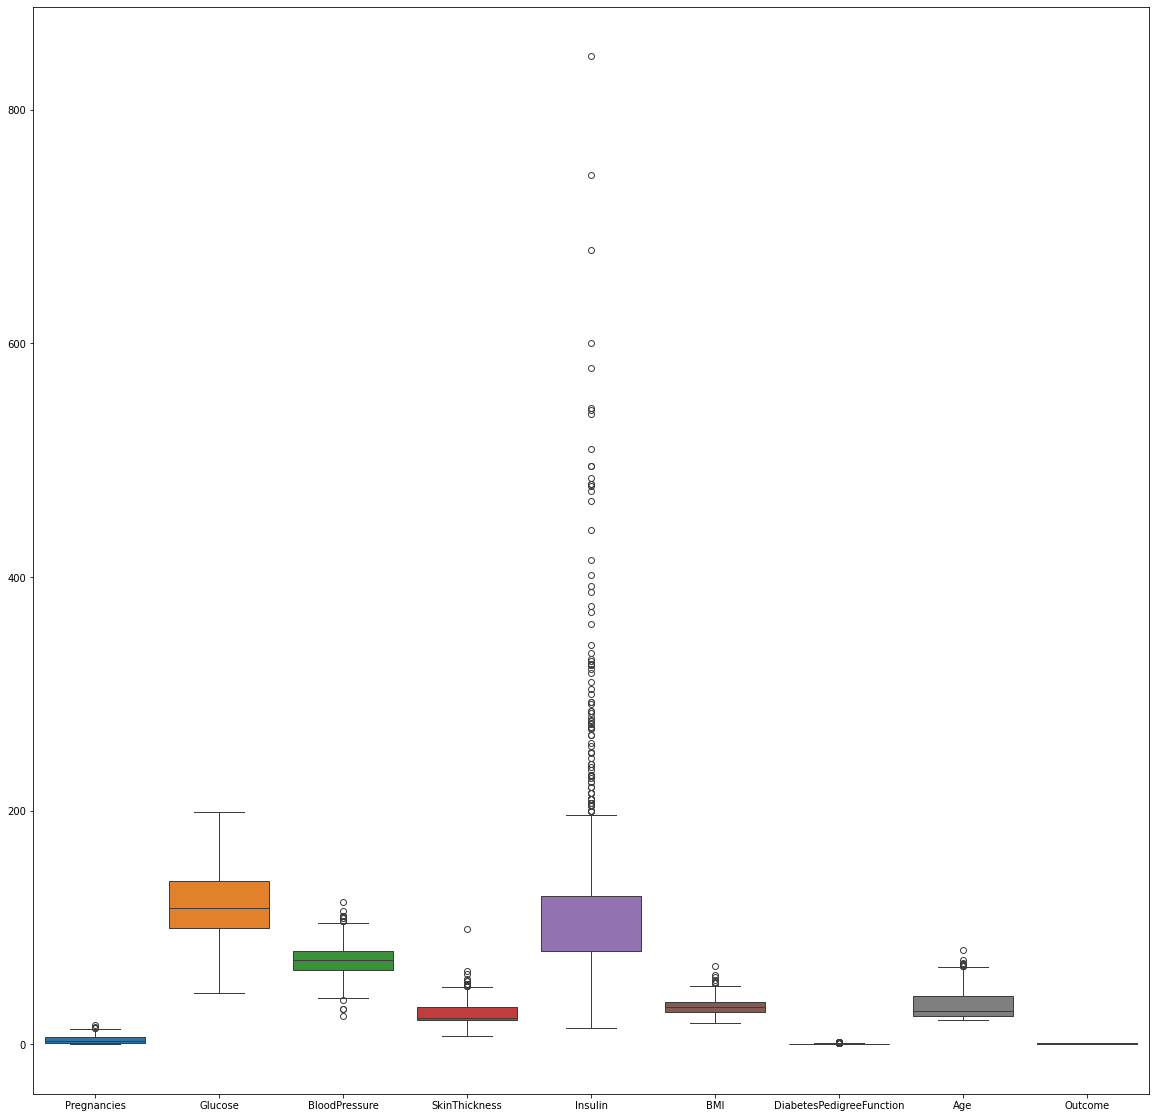

In [8]:
plt.figure(figsize=(20,20))
sns.boxplot(df)
plt.show()

##### We can observe that the Insulin feature has a lot of outliers in it. So, it is better to replace them rather remove them from the dataset. And since there are lot of outliers in the dataset, it is better to replace the outlr with the median value and not the mean.

##### Before proceeding, let's segregate the Dependent and the Independent features first.

In [9]:
X = df.drop(columns=["Outcome"])
y = df["Outcome"]

##### Train Test Split

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print(f"The training shape is:{X_train.shape}, {y_train.shape}")
print(f"The testing shape is:{X_test.shape}, {y_test.shape}")

The training shape is:(576, 8), (576,)
The testing shape is:(192, 8), (192,)


##### Since there are lot of outliers in the dataset, let's use StandardScaler to scale them.

In [11]:
import pickle
from sklearn.preprocessing import StandardScaler

def standard_scaler(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # saving the model for later usage
    file = open("../models/standards_scaler_model.pkl", "wb")
    pickle.dump(scaler, file)
    file.close()
    
    return X_train_scaled, X_test_scaled

In [12]:
X_train_scaled, X_test_scaled = standard_scaler(X_train, X_test)

In [13]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

##### Let's apply hyper parameter tuning

In [14]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'penalty' : ["l1", "l2"],
    'C' : np.logspace(-3,3,7),
    'solver' : ["newton-cg", "lbfgs", "liblinear"]
}

In [15]:
clf = GridSearchCV(model,
                  param_grid=parameters,
                  scoring="accuracy",
                  cv=10)

clf.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

##### Let's checkout the best parameters of the model

In [16]:
clf.best_params_

{'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}

In [17]:
clf.best_score_

0.763793103448276

##### Let's check the model on test dataset

In [18]:
y_pred = clf.predict(X_test_scaled)

##### Let's get the accuracy parameters

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[117,  13],
       [ 26,  36]], dtype=int64)

In [20]:
accuracy_score = accuracy_score(y_test, y_pred)
print(f"accuracy is:{accuracy_score}")

accuracy is:0.796875


In [21]:
precision = precision_score(y_test, y_pred)
print(f"precision is:{precision}")

precision is:0.7346938775510204


In [22]:
recall = recall_score(y_test, y_pred)
print(f"recall is:{recall}")

recall is:0.5806451612903226


In [23]:
f1_score = f1_score(y_test, y_pred)
print(f"f1_score is:{f1_score}")

f1_score is:0.6486486486486487


##### Let's dump this model for later usage

In [24]:
model_file = open("../models/LogisticRegressionModel.pkl", "wb")
pickle.dump(obj=clf, file=model_file)
model_file.close()

In [25]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47
